In [147]:
import numpy as np
import pandas as pd
from sklearn import linear_model

In [148]:
ds = pd.read_csv("/home/prasun/GitDemo/Stat_ML-Learning/Exercise2/dataset.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [149]:
# have a look
print(ds.experience)

0       NaN
1       NaN
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object


In [150]:
from sklearn.preprocessing import OrdinalEncoder
o_e = OrdinalEncoder()
exp_encoded = o_e.fit_transform(ds[["experience"]])

In [151]:
# Missing Value Treatment
exp_encoded
ds["exp_encoded"]= exp_encoded
med1 = ds.exp_encoded.median()
med2 = ds["test_score(out of 10)"].median()
ds["exp_encoded"] = ds.exp_encoded.fillna(med1)
ds["test_score(out of 10)"] = ds["test_score(out of 10)"].fillna(med2)

In [152]:
# Dropping Eartwhile "experience" feature
ds_final = ds.drop("experience",axis=1)

In [153]:
ds_final

,test_score(out of 10),interview_score(out of 10),salary($),exp_encoded
0,8.0,9,50000,2.5
1,8.0,6,45000,2.5
2,6.0,7,60000,1.0
3,10.0,10,65000,5.0
4,9.0,6,70000,2.0
5,7.0,10,62000,4.0
6,8.0,7,72000,3.0
7,7.0,8,80000,0.0


array([[<Axes: xlabel='test_score(out of 10)', ylabel='test_score(out of 10)'>,
        <Axes: xlabel='interview_score(out of 10)', ylabel='test_score(out of 10)'>,
        <Axes: xlabel='salary($)', ylabel='test_score(out of 10)'>,
        <Axes: xlabel='exp_encoded', ylabel='test_score(out of 10)'>],
       [<Axes: xlabel='test_score(out of 10)', ylabel='interview_score(out of 10)'>,
        <Axes: xlabel='interview_score(out of 10)', ylabel='interview_score(out of 10)'>,
        <Axes: xlabel='salary($)', ylabel='interview_score(out of 10)'>,
        <Axes: xlabel='exp_encoded', ylabel='interview_score(out of 10)'>],
       [<Axes: xlabel='test_score(out of 10)', ylabel='salary($)'>,
        <Axes: xlabel='interview_score(out of 10)', ylabel='salary($)'>,
        <Axes: xlabel='salary($)', ylabel='salary($)'>,
        <Axes: xlabel='exp_encoded', ylabel='salary($)'>],
       [<Axes: xlabel='test_score(out of 10)', ylabel='exp_encoded'>,
        <Axes: xlabel='interview_score(out of 

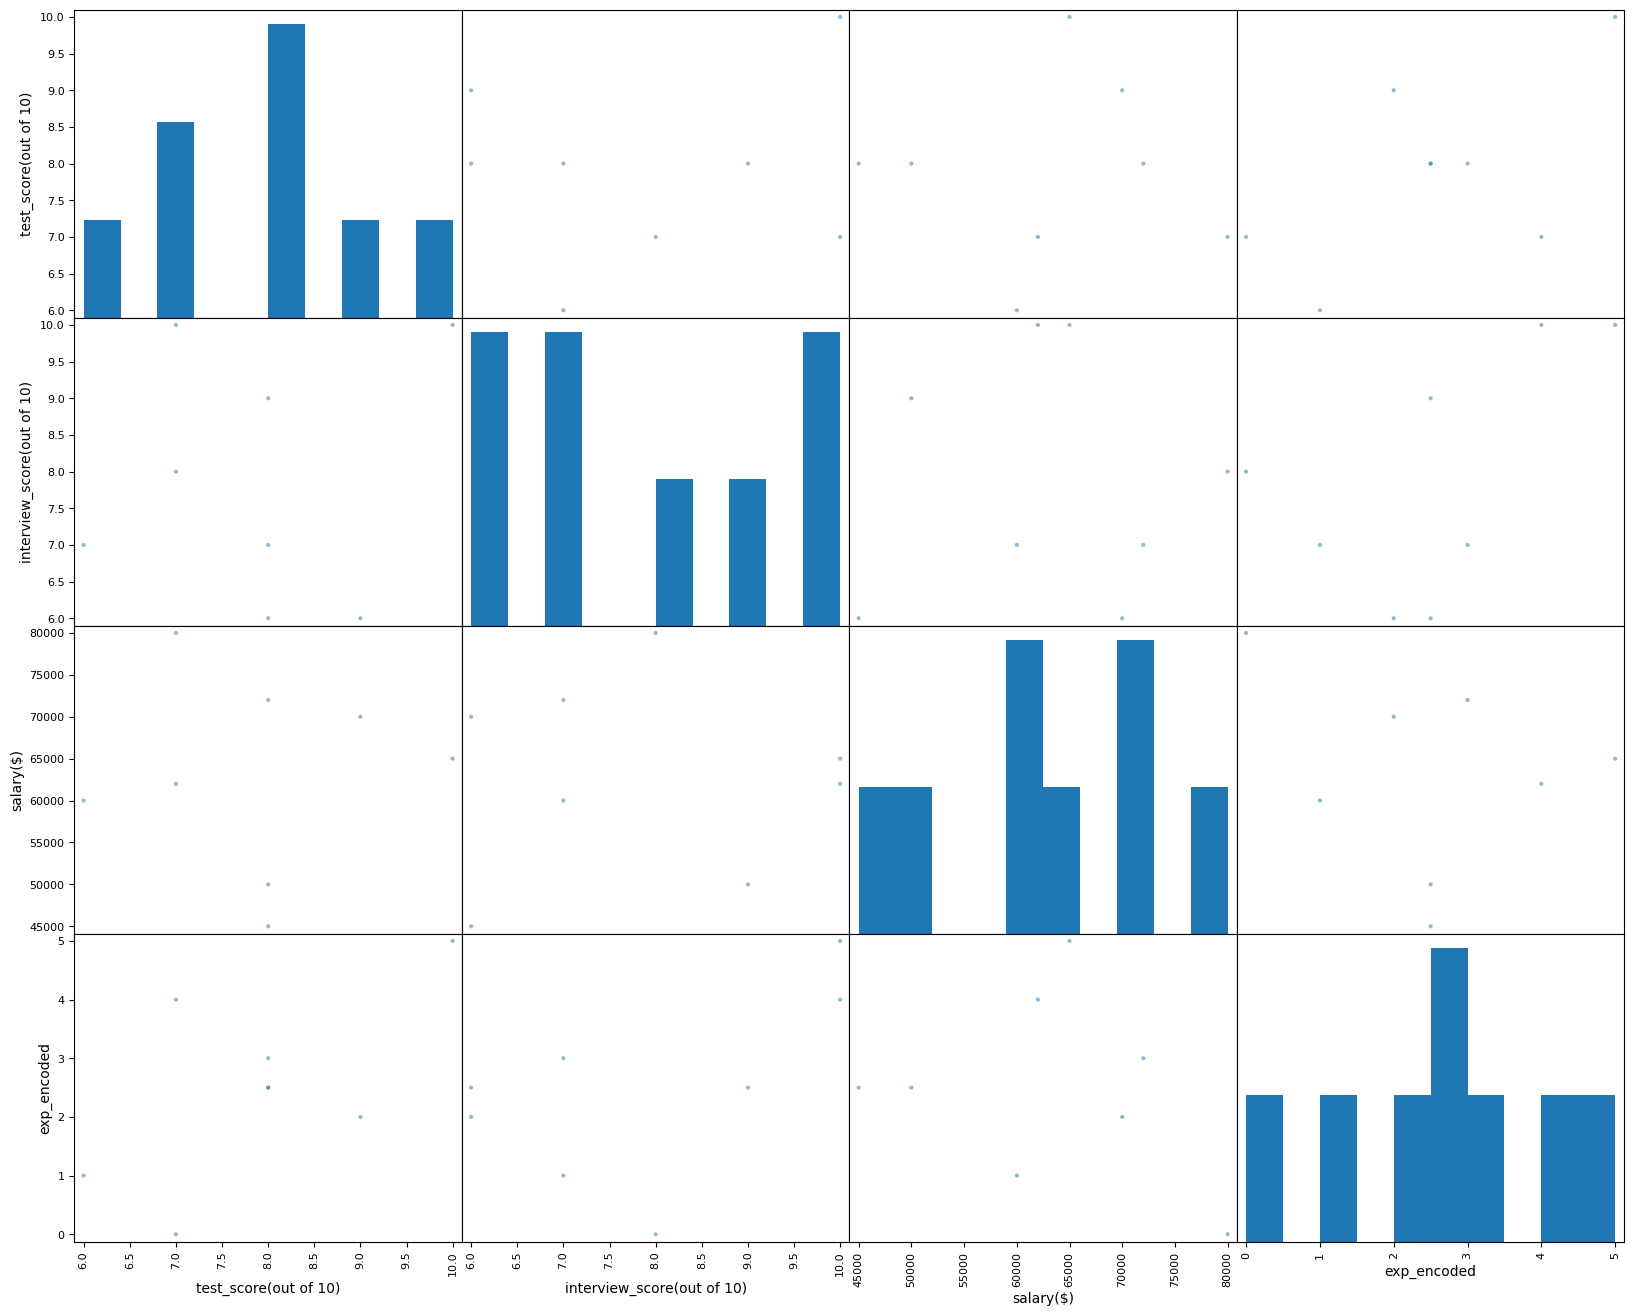

In [154]:
from pandas.plotting import scatter_matrix
attrib = ["test_score(out of 10)","interview_score(out of 10)",	"salary($)",	"exp_encoded"]
scatter_matrix(ds_final[attrib], figsize=(20,16))

In [155]:
# Train Set
X = ds_final[["test_score(out of 10)","interview_score(out of 10)","exp_encoded"]]
y = ds_final[["salary($)"]]

In [156]:
# Model Fitting
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [157]:
print(reg.coef_)
print(reg.intercept_)

[[ 3746.20594086  2683.33296082 -5267.20457746]]
[25535.39259292]
